##                          USED CAR PRICE PREDICTION -- VISUALIZATION AND EXPLORATION

#### IMPORT PYTHON LIBRARIES:

Pandas and Numpy have been used for Data Manipulation and numerical Calculations

Matplotlib and Seaborn have been used for Data visualizations. 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### READING DATASET:

We are trying to analyze the used car’s price prediction. And analyse the factors which could affects the target variable(Price)  


In [34]:
cars=pd.read_csv("C:/Users/DEEPIKA/Downloads/used_cars_data.csv")

#### ANALYZING THE DATA:

  The main goal of data understanding is to gain general insights about the data, which covers the number of rows and columns, values in the data, datatypes, and Missing values in the dataset.
  
  There are 7252 observations and 14 variables in our dataset

In [3]:
cars.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [156]:
cars.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170,5.0,NaN,NaN


#### INFO:

info() helps to understand the data type and information about data, 
including the number of records in each column, data having null or not null, Data type, the memory usage of the dataset

In [134]:
cars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Kilometers_Driven          7253 non-null   int64  
 1   Mileage                    7253 non-null   float64
 2   Engine                     7253 non-null   float64
 3   Power                      7253 non-null   float64
 4   Seats                      7253 non-null   float64
 5   Price                      7253 non-null   float64
 6   Car_Age                    7253 non-null   int64  
 7   Model                      0 non-null      float64
 8   Brand_Audi                 7253 non-null   uint8  
 9   Brand_BMW                  7253 non-null   uint8  
 10  Brand_Bentley              7253 non-null   uint8  
 11  Brand_Chevrolet            7253 non-null   uint8  
 12  Brand_Datsun               7253 non-null   uint8  
 13  Brand_Fiat                 7253 non-null   uint8

#### CONVERT THE DATATYPE:

In [35]:
cars.Mileage = cars.Mileage.str.replace(r'kmpl$', '')

cars.Mileage = cars.Mileage.str.replace(r'km/kg$', '')

In [36]:
cars.Engine = cars.Engine.str.replace(r'CC$', '')

In [37]:
cars.Power = cars.Power.str.replace(r'bhp$', '')


In [38]:
cars.Power = cars.Power.str.replace(r'null$', '')

In [39]:
cars.New_Price = cars.New_Price.str.replace(r'Lakh$', '')

cars.New_Price = cars.New_Price.str.replace(r'Cr$', '')

In [40]:
cars['Engine'] = cars['Engine'].astype(float)

In [41]:
cars['Mileage'] = cars['Mileage'].astype(float)

In [42]:
cars['New_Price'] = cars['New_Price'].astype(float)

In [43]:
cars['Power'] = cars['Power'].astype(float)

#### CHECK FOR DUPLICATION:

In [55]:
cars.nunique()

Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               438
Engine                150
Power                 383
Seats                   9
New_Price             625
Price                1373
Car_Age                23
Brand                  32
Model                 726
dtype: int64

#### MISSING VALUES CALCULATION:

In [183]:
cars.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
dtype: int64

#### Calculate the percentage of missing values in each column:

In [225]:
(cars.isnull().sum()/(len(cars)))*100

Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.000000
Engine                0.000000
Power                 0.000000
Seats                 0.000000
New_Price            86.129877
Price                 0.000000
Car_Age               0.000000
Brand                 0.000000
Model                 0.013787
dtype: float64

## FEATURE ENGINEERING

#### CREATING NEW VARIABLE:

In [44]:
from datetime import date
date.today().year
cars['Car_Age']=date.today().year-cars['Year']
cars.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,13
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,8
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,12
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10


#### SPLIT THE NAME:

In [45]:
cars['Brand'] = cars.Name.str.split().str.get(0)

In [46]:
cars['Model'] = cars.Name.str.split().str.get(1) + cars.Name.str.split().str.get(2)

In [15]:
cars[['Name','Brand','Model']]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6
2,Honda Jazz V,Honda,JazzV
3,Maruti Ertiga VDI,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4New
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,VentoDiesel
7249,Volkswagen Polo GT TSI,Volkswagen,PoloGT
7250,Nissan Micra Diesel XV,Nissan,MicraDiesel
7251,Volkswagen Polo GT TSI,Volkswagen,PoloGT


In [25]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,13,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,8,Hyundai,Creta1.6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,12,Honda,JazzV
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10,Audi,A4New


#### DATA REDUCTION:

In [47]:
cars = cars.drop(['S.No.'], axis = 1)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   float64
 12  Price              6019 non-null   float64
 13  Car_Age            7253 non-null   int64  
 14  Brand              7253 non-null   object 
 15  Model              7252 non-null   object 
dtypes: float64(6), int64(3),

#### DATA CLEANING:

In [246]:
print(cars.Brand.unique())
print(cars.Brand.nunique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']
33


In [247]:
searchfor = ['Isuzu' ,'ISUZU','Mini','Land']
cars[cars.Brand.str.contains('|'.join(searchfor))].head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,NaN,27.00,9,Land,RoverRange
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.00,2179.0,115.00,5.0,NaN,17.50,11,Land,RoverFreelander
176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.60,1998.0,112.00,5.0,NaN,23.00,6,Mini,CountrymanCooper
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,NaN,55.76,5,Land,RoverRange
228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82,1998.0,189.08,4.0,44.28,35.67,6,Mini,CooperConvertible


In [48]:
cars["Brand"].replace({"ISUZU": "Isuzu", "Mini": "Mini Cooper","Land":"Land Rover"}, inplace=True)

#### STATISTICS SUMMARY:

The information gives a quick and simple description of the data

In [13]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.00,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.00,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.10,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.00,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.10,616.00
Seats,7200.0,5.279722,0.811660,0.00,5.000,5.00,5.00,10.00
New_Price,1006.0,19.894324,19.813947,1.00,7.635,11.27,23.64,99.92
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.95,160.00


describe(include=’all’) provides a statistics summary of all data, include object, category etc

In [15]:
cars.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251.0,NaN,NaN,NaN,18.14158,4.562197,0.0,15.17,18.16,21.1,33.54
Engine,7207.0,NaN,NaN,NaN,1616.57347,595.285137,72.0,1198.0,1493.0,1968.0,5998.0
Power,7078.0,NaN,NaN,NaN,112.765214,53.493553,34.2,75.0,94.0,138.1,616.0


*Years range from 1996- 2019 and has a high in a range which shows used cars contain both latest models and old model cars.

*It looks like Engine and Power have outliers, and the data is right-skewed.

*The average number of seats in a car is 5. car seat is an important feature in price contribution.


#### IMPUTE MISSING VALUES WITH MEAN:

In [17]:
cars.loc[cars["Mileage"]==0.0,'Mileage']=np.nan
cars.Mileage.isnull().sum()

83

In [49]:
mean=cars['Mileage'].mean()
cars['Mileage'].replace(np.nan,mean, inplace=True)

In [63]:
cars.loc[cars["Engine"]==0.0,'Engine']=np.nan
cars.Engine.isnull().sum()

0

In [50]:
mean=cars['Engine'].mean()
cars['Engine'].replace(np.nan,mean, inplace=True)

In [64]:
cars.loc[cars["Seats"]==0.0,'Seats']=np.nan
cars.Seats.isnull().sum()

54

In [51]:
mean=cars['Seats'].mean()
cars['Seats'].replace(np.nan,mean, inplace=True)

In [66]:
cars.loc[cars["Power"]==0.0,'Power']=np.nan
cars.Power.isnull().sum()

175

In [52]:
mean=cars['Power'].mean()
cars['Power'].replace(np.nan,mean, inplace=True)

In [224]:
cars.loc[cars["Price"]==0.0,'Price']=np.nan
cars.Price.isnull().sum()

0

In [53]:
mean=cars['Price'].mean()
cars['Price'].replace(np.nan,mean, inplace=True)

#### SEPERATE NUMERICAL & CATEGORICAL VARIABLES:

In [254]:
cat_cols=cars.select_dtypes(include=['object']).columns
num_cols = cars.select_dtypes(include=np.number).columns.tolist()

In [255]:
cat_cols

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand',
       'Model'],
      dtype='object')

In [256]:
num_cols


['Year',
 'Kilometers_Driven',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'New_Price',
 'Price',
 'Car_Age']

#### DATA VISUALIZATION

Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.

Histogram and box plot is used to show the pattern of the variables, as some variables have skewness and outliers.

Year
Skew : -0.84


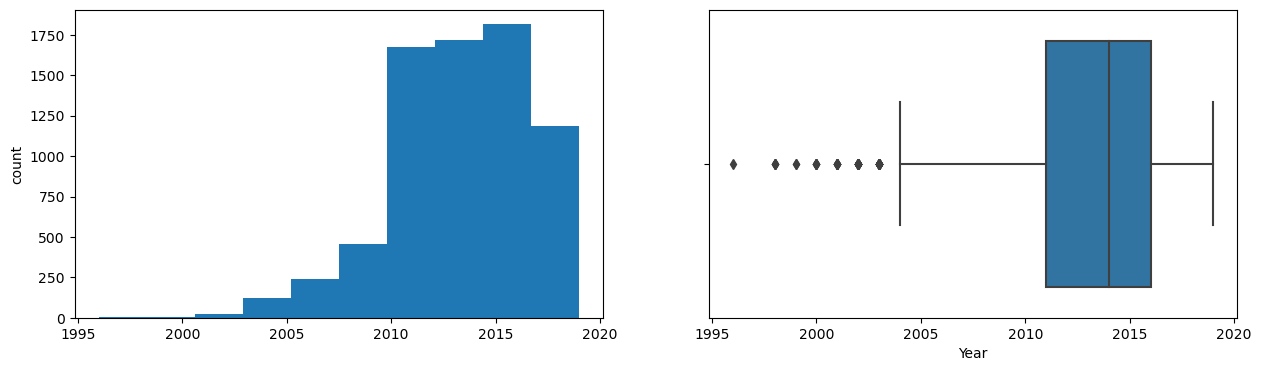

Kilometers_Driven
Skew : 61.58


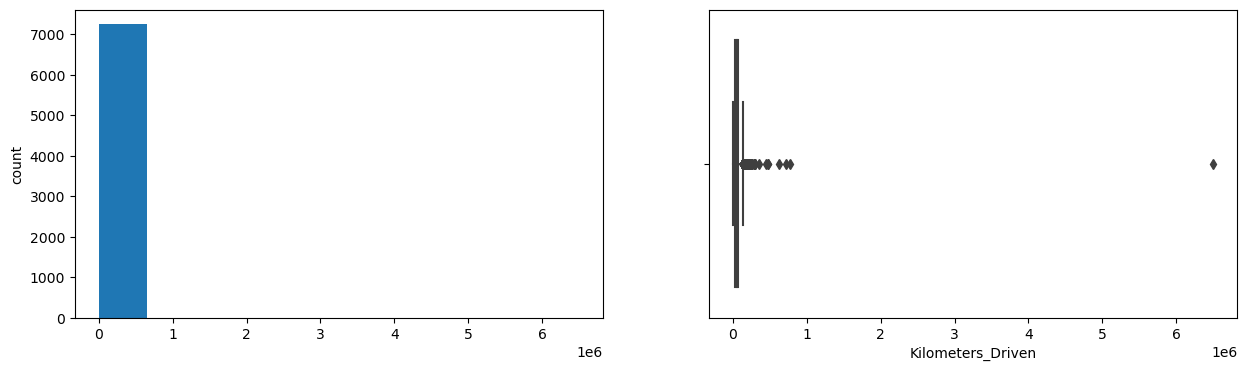

Mileage
Skew : -0.44


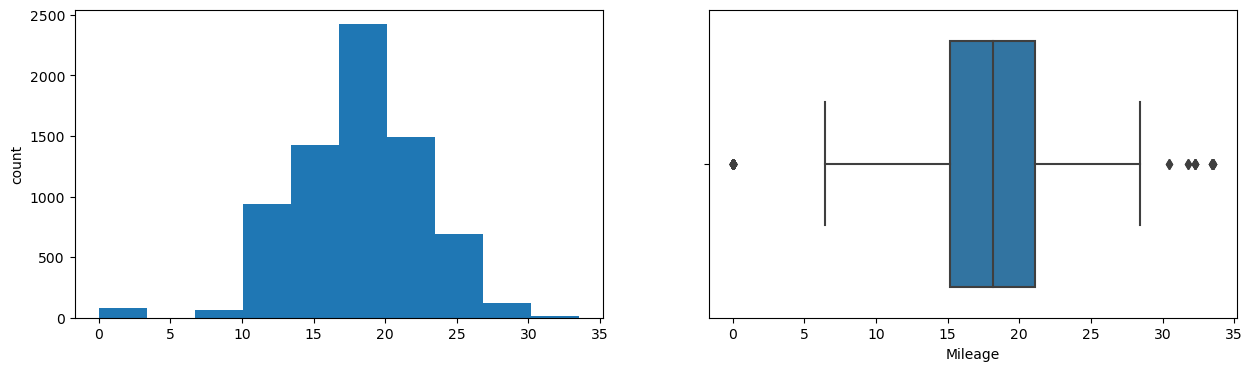

Engine
Skew : 1.42


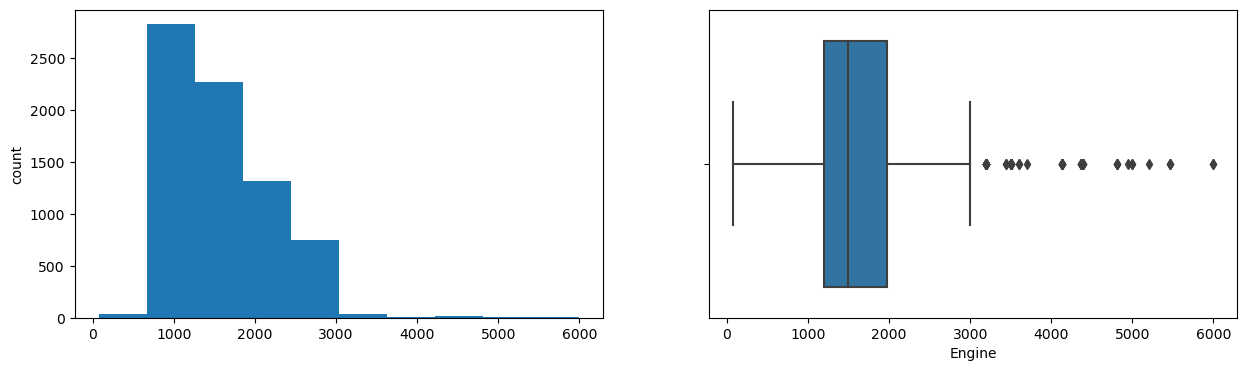

Power
Skew : 1.99


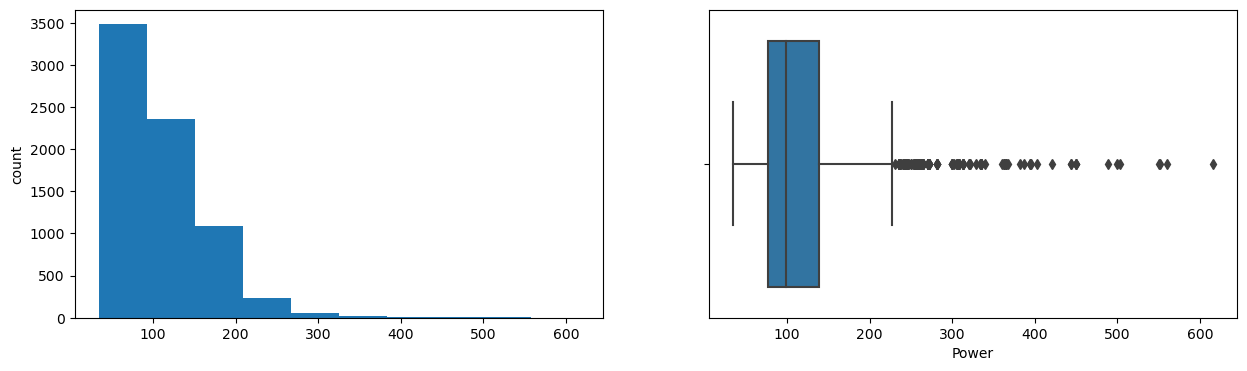

Seats
Skew : 1.91


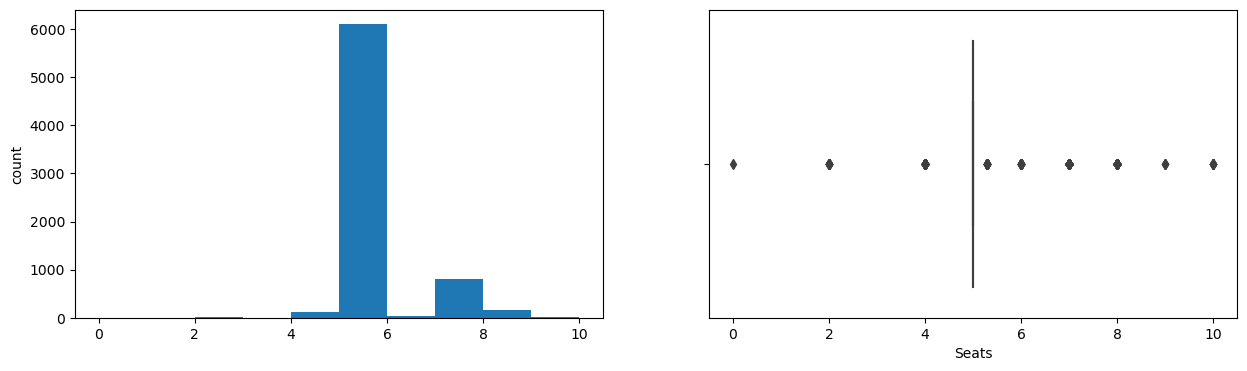

New_Price
Skew : 1.84


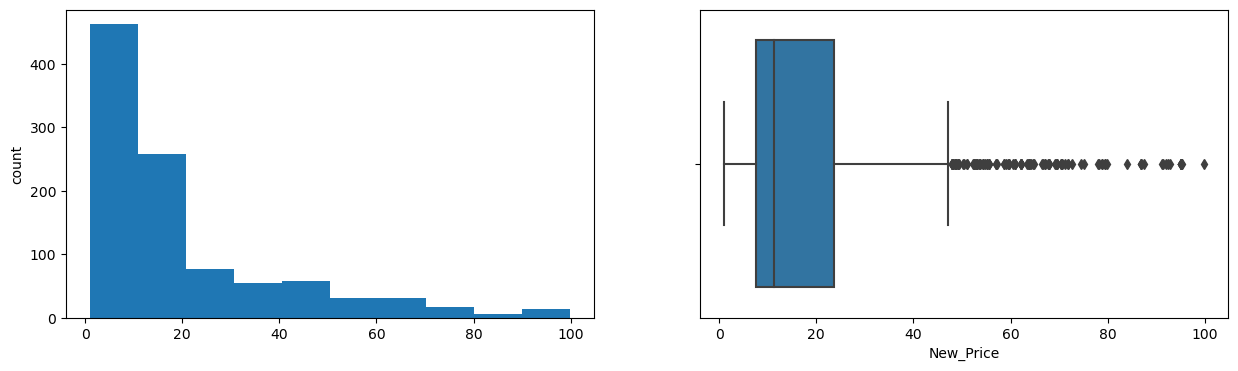

Price
Skew : 3.66


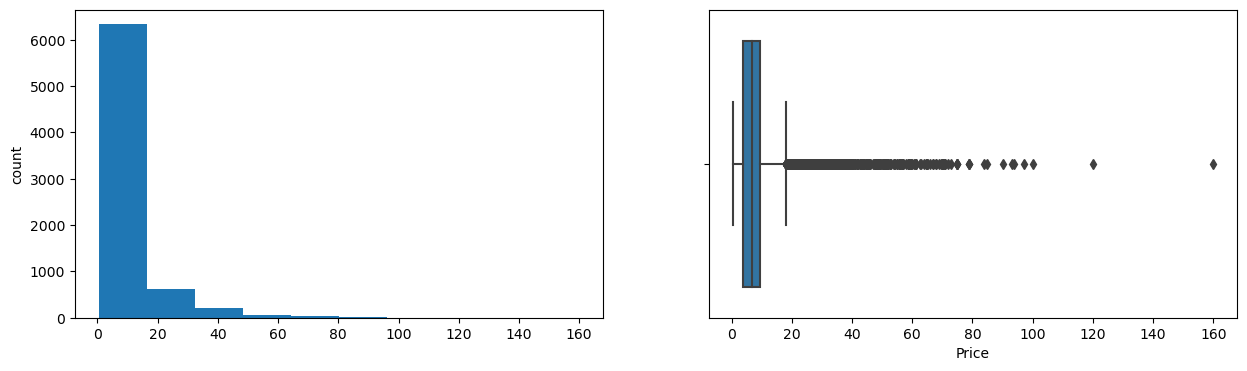

Car_Age
Skew : 0.84


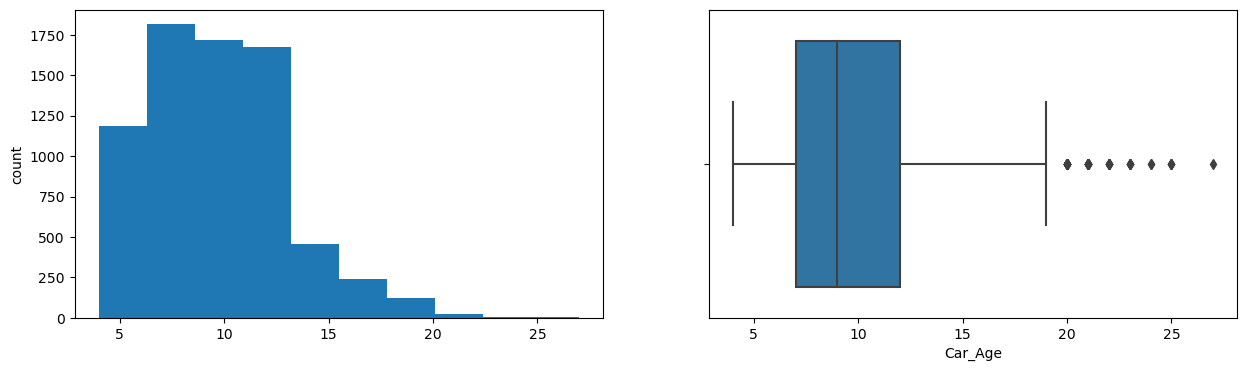

In [203]:
for col in num_cols:
    print(col)
    print('Skew :', round(cars[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    cars[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=cars[col])
    plt.show()

categorical variables are being visualized using a count plot. 

Categorical variables provide the pattern of factors influencing car price

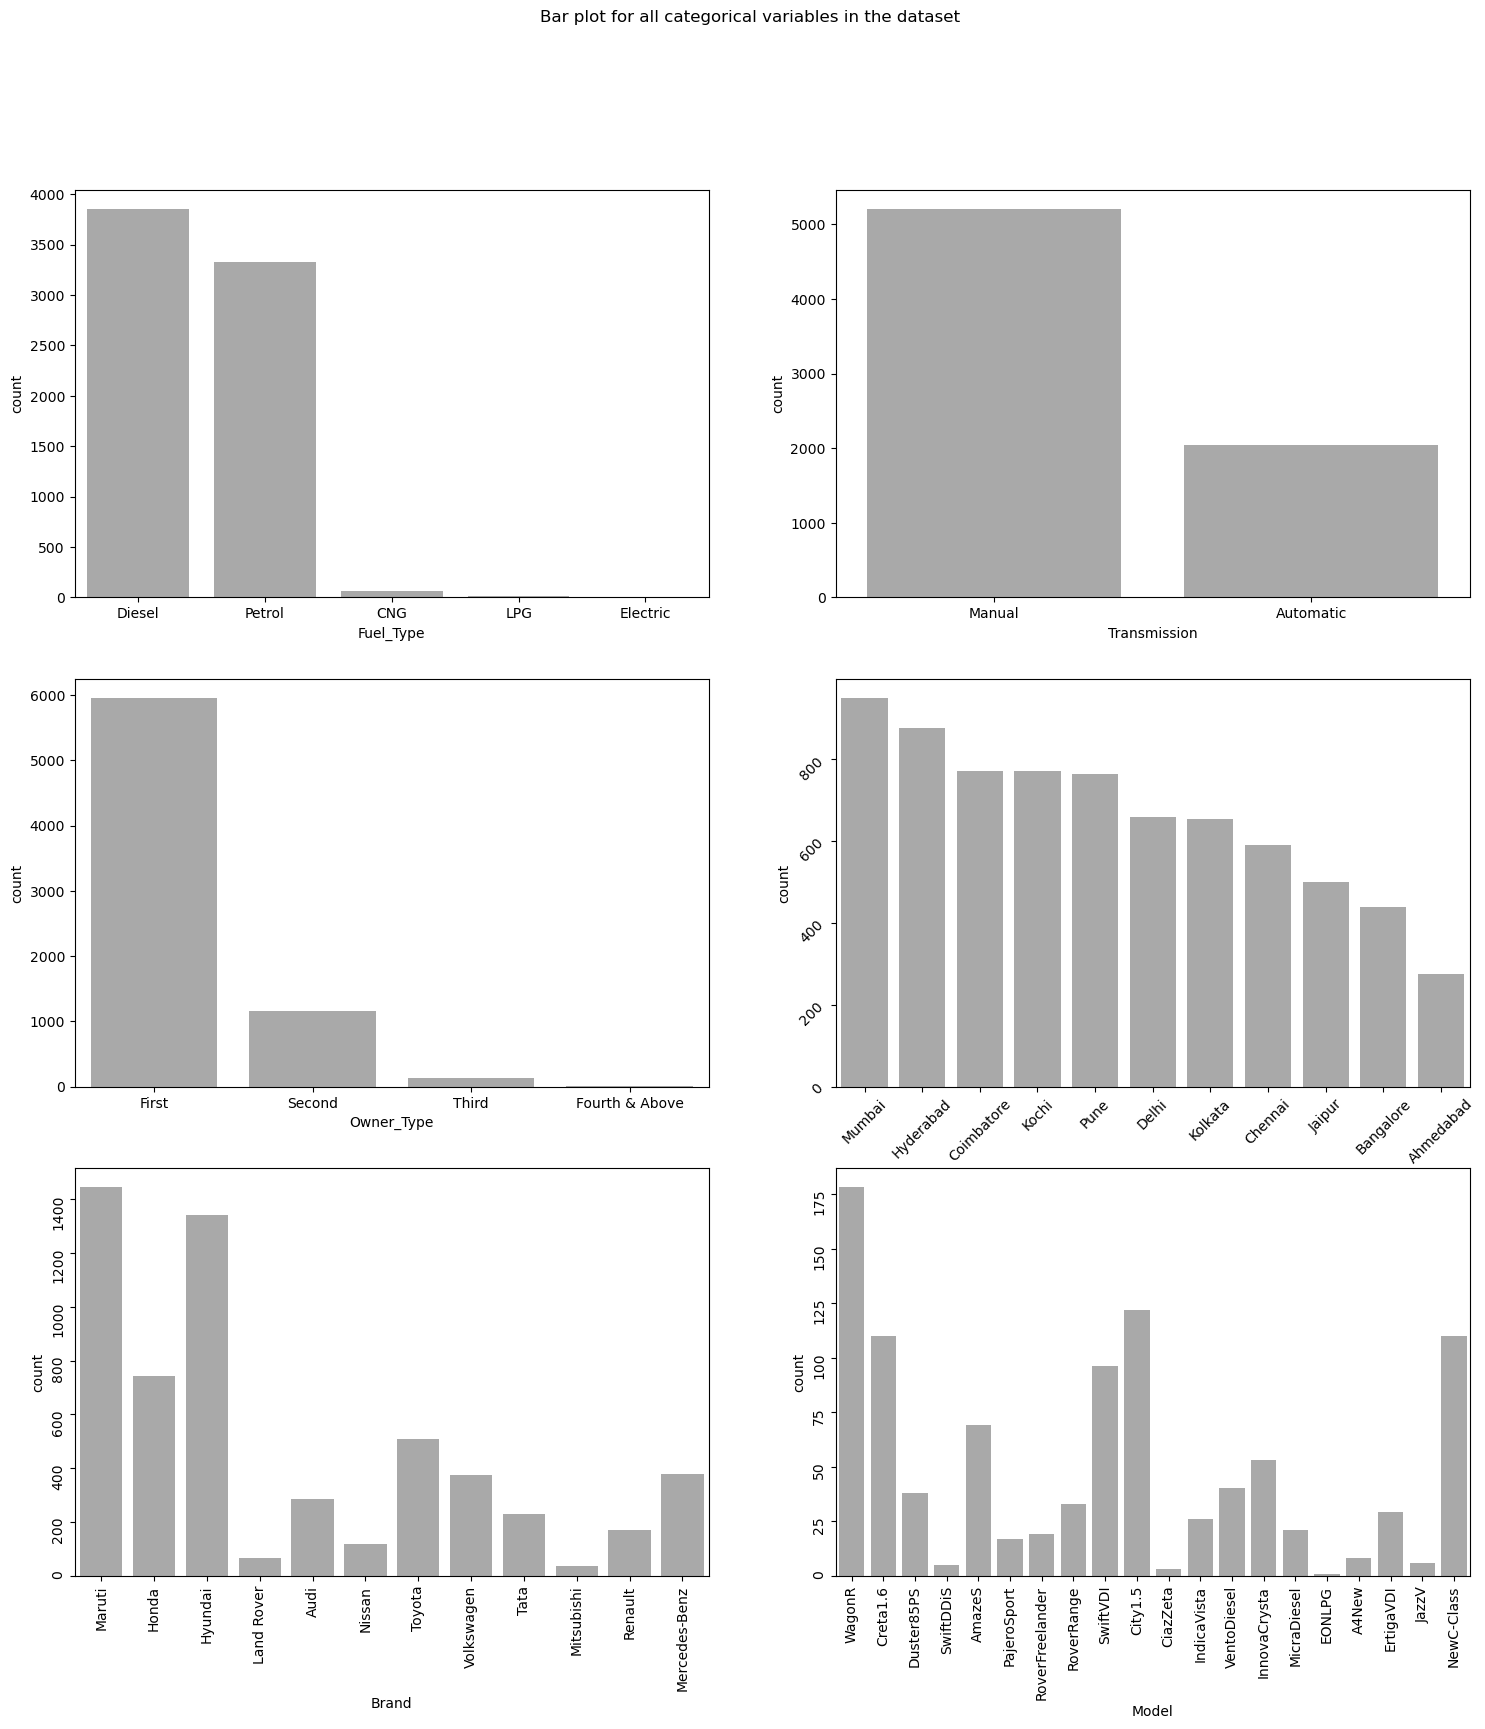

In [31]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Fuel_Type', data = cars, color = 'darkgrey', 
              order = cars['Fuel_Type'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Transmission', data = cars, color = 'darkgrey', 
              order = cars['Transmission'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Owner_Type', data = cars, color = 'darkgrey', 
              order = cars['Owner_Type'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Location', data = cars, color = 'darkgrey', 
              order = cars['Location'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Brand', data = cars, color = 'darkgrey', 
              order = cars['Brand'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'Model', data = cars, color = 'darkgrey', 
              order = cars['Model'].head(20).value_counts().index);


axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);


From the count plot, we observed that:
    
* Mumbai has the highest number of cars available for purchase, and then followed by Hyderabad and Coimbatore.
    
* First owned cars are higher in ratio when compared to other,this shows most of the buyers prefer to purchase first-owner cars.
    
* Most of the carshave Manual transmission.
    
* Cars have fuel type is Diesel is in higher range this shows diesel cars provide higher performance.

* WagonR ranks first among all models which are available for purchase.

* The brand 'Maruti' is in top followed by 'Hyundai'

#### PAIR PLOT:
     To understand the best set of features to explain a relationship between two variables or to form the most separated clusters.


<Figure size 1300x1700 with 0 Axes>

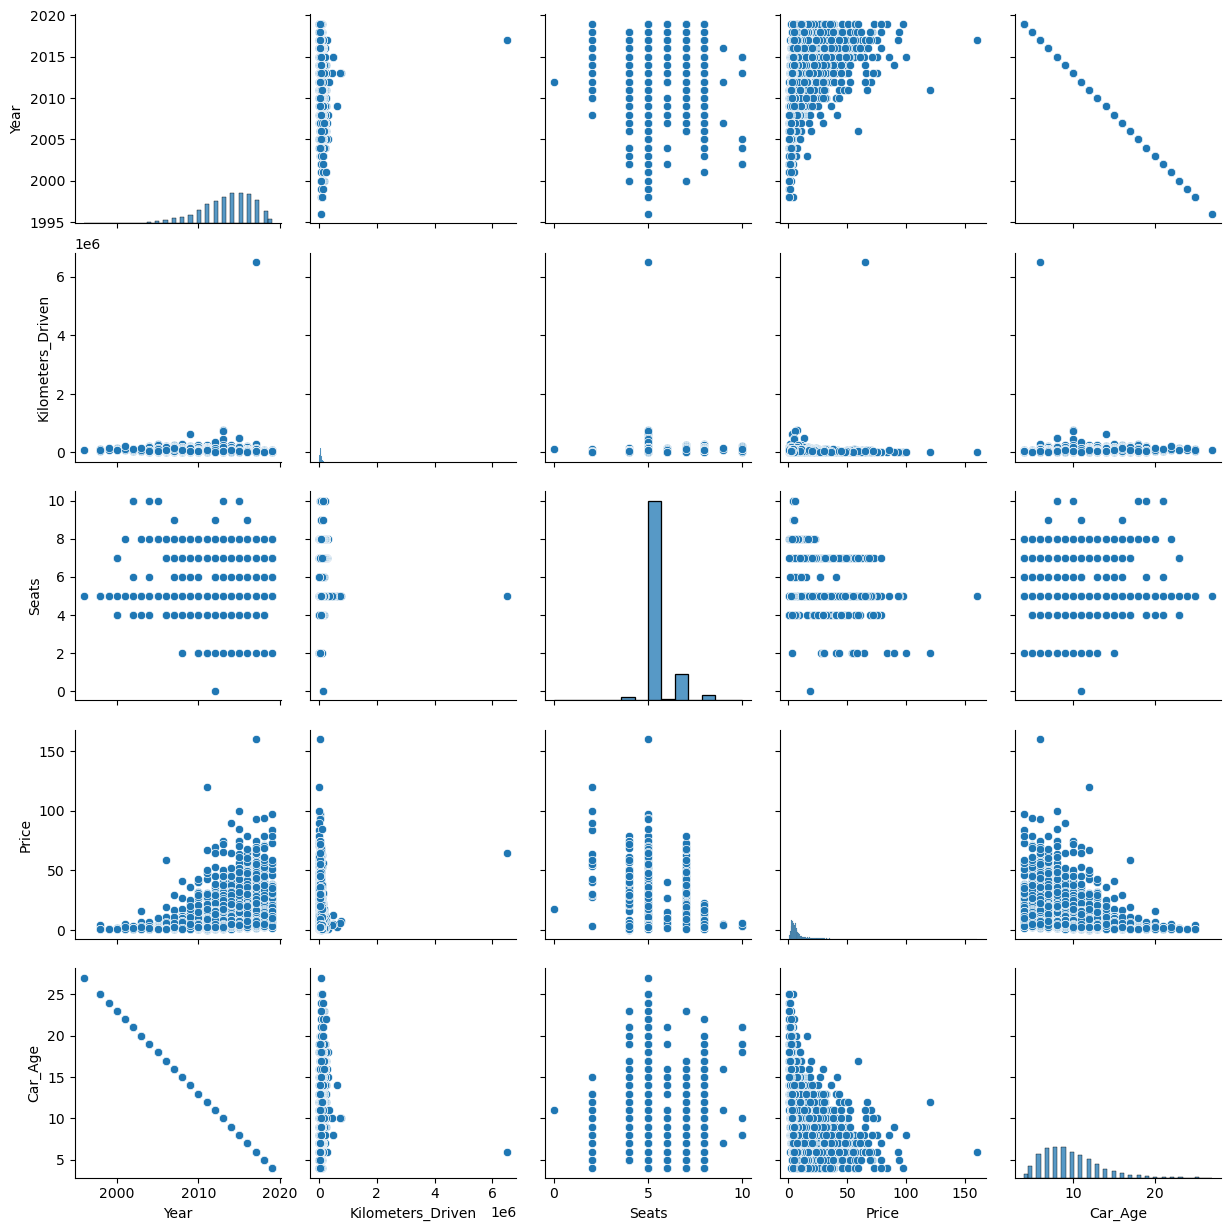

In [40]:
plt.figure(figsize=(13,17))
sns.pairplot(data=cars)
plt.show()

#### SCATTER PLOT:

<AxesSubplot:xlabel='Year', ylabel='Mileage'>

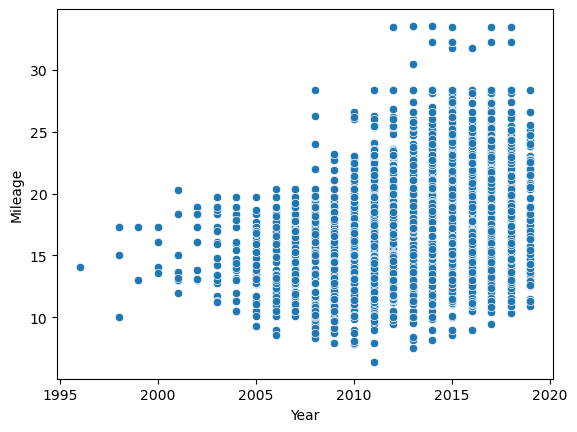

In [34]:
sns.scatterplot(x="Year",
               y="Mileage",
               data=cars)

<AxesSubplot:xlabel='Year', ylabel='Kilometers_Driven'>

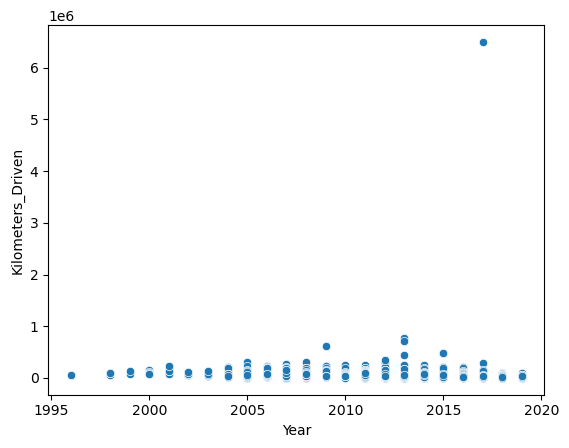

In [35]:
sns.scatterplot(x="Year",
               y="Kilometers_Driven",
               data=cars)

<AxesSubplot:xlabel='Year', ylabel='Price'>

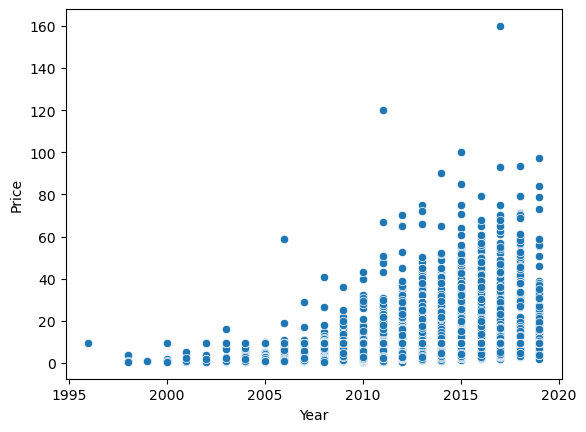

In [36]:
sns.scatterplot(x="Year",
               y="Price",
               data=cars)

<AxesSubplot:xlabel='Mileage', ylabel='Power'>

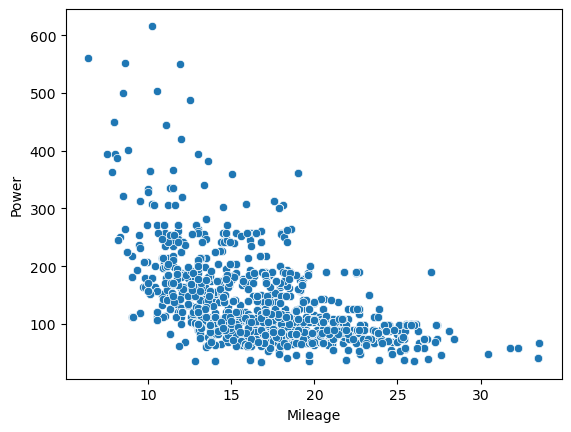

In [37]:
sns.scatterplot(x="Mileage",
               y="Power",
               data=cars)

<AxesSubplot:xlabel='Power', ylabel='Price'>

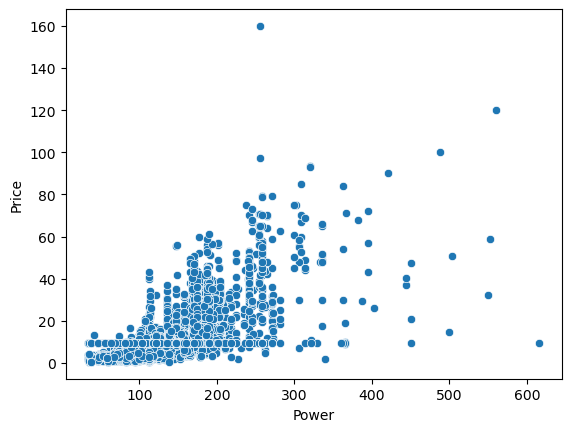

In [83]:
sns.scatterplot(x="Power",
               y="Price",
               data=cars)

<AxesSubplot:xlabel='Engine', ylabel='Price'>

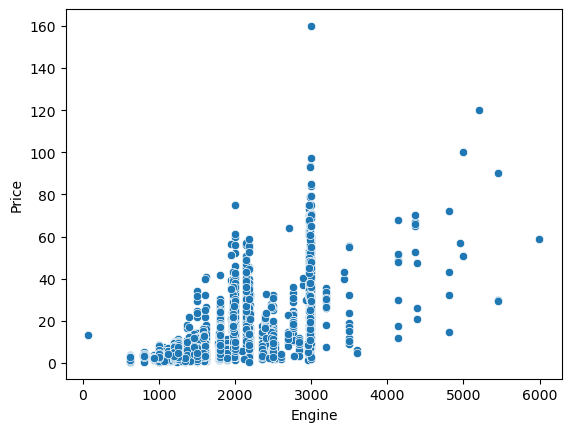

In [193]:
sns.scatterplot(x="Engine",
               y="Price",
               data=cars)

<AxesSubplot:xlabel='Mileage', ylabel='Price'>

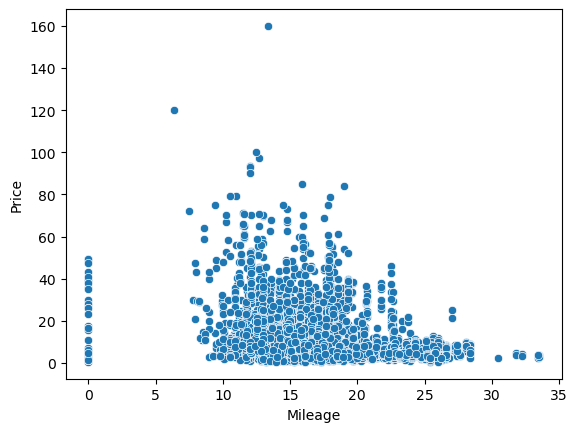

In [37]:
sns.scatterplot(x="Mileage",
               y="Price",
               data=cars)

<AxesSubplot:xlabel='Location', ylabel='Price'>

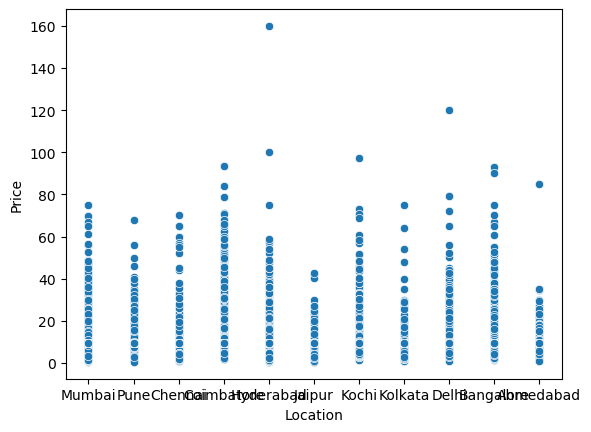

In [96]:
sns.scatterplot(x="Location",
               y="Price",
               data=cars)

From the above plots,we can have below observations:
    
    Year has a positive correlation with price and mileage.
    Car with recent make is higher at prices.
    Engine and Power increase, and the price of the car increases.
    As power increases, mileage decreases

<AxesSubplot:xlabel='Location', ylabel='Price'>

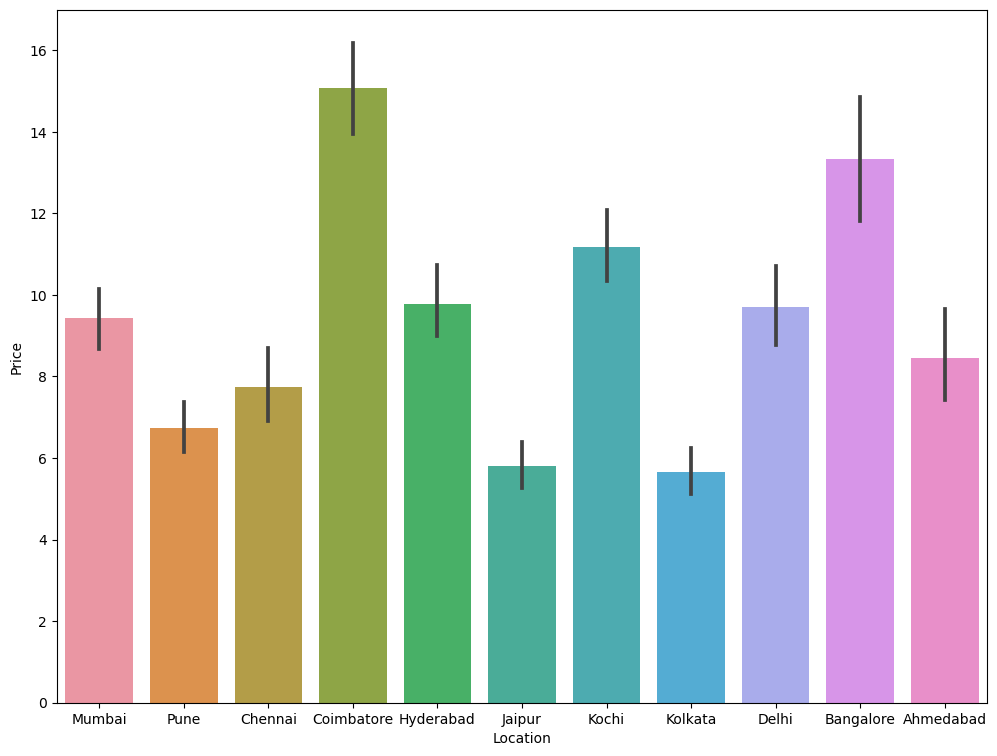

In [36]:
plt.figure(figsize=(12,9), dpi=100)
sns.barplot(x='Location',y='Price',data=cars)

<AxesSubplot:xlabel='Transmission', ylabel='Price'>

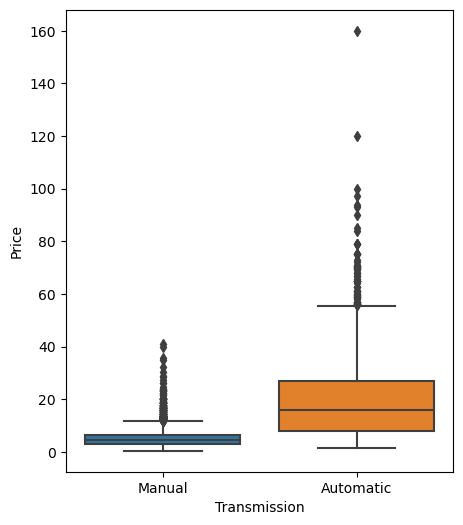

In [235]:
plt.figure(figsize=(5,6), dpi=100)
sns.boxplot(x='Transmission',y='Price',data=cars)


<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

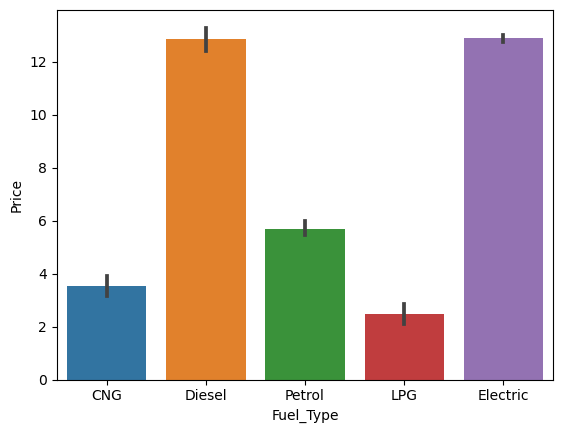

In [232]:

sns.barplot(x='Fuel_Type',y='Price',data=cars)

<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

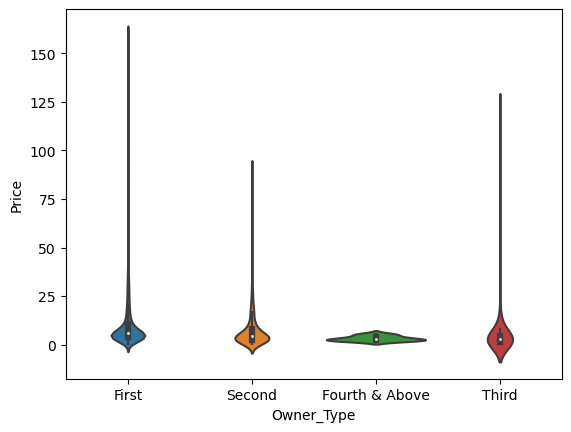

In [32]:
sns.violinplot(x='Owner_Type',y='Price',data=cars)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


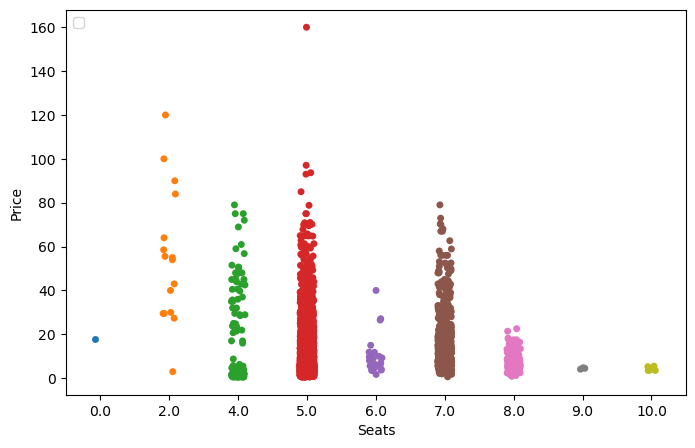

In [34]:
plt.figure(figsize=(8,5))

sns.stripplot(x='Seats',y='Price',data=cars,jitter=True,dodge=True)

plt.legend(loc=2)

<AxesSubplot:xlabel='Price', ylabel='Brand'>

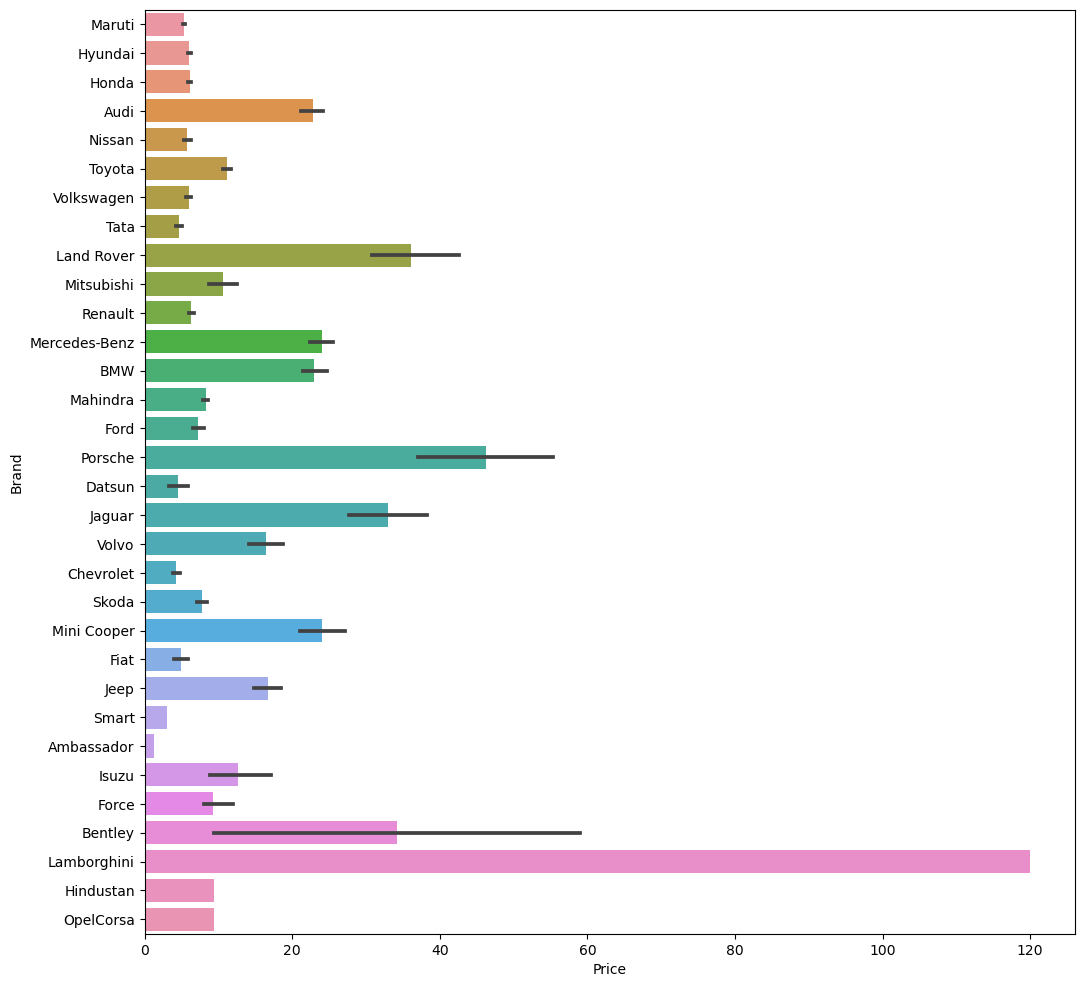

In [258]:
plt.figure(figsize=(12,12), dpi=100)
sns.barplot(x='Price',y='Brand',data=cars)

<AxesSubplot:xlabel='Price', ylabel='Brand'>

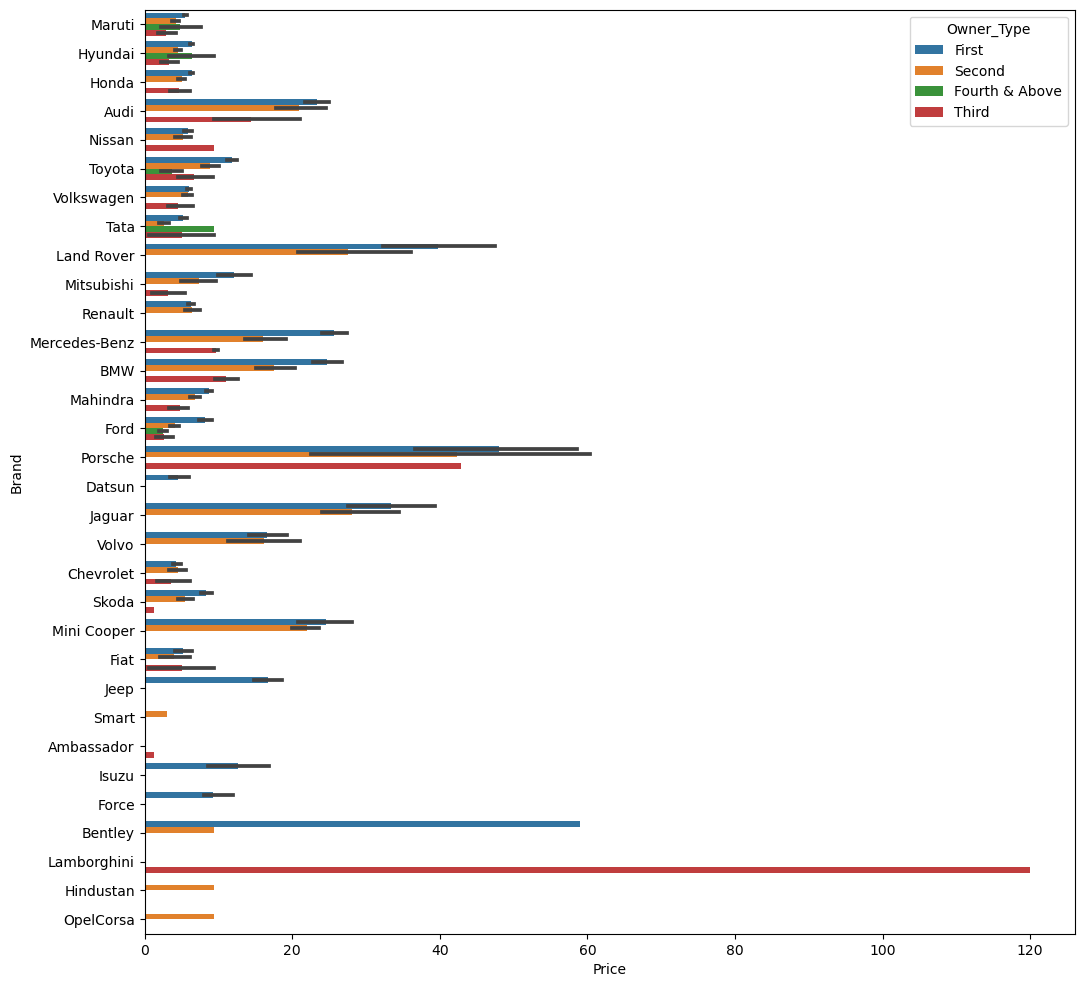

In [257]:
plt.figure(figsize=(12,12), dpi=100)
sns.barplot(x='Price',y='Brand',hue='Owner_Type',data=cars)

<AxesSubplot:xlabel='Car_Age', ylabel='Price'>

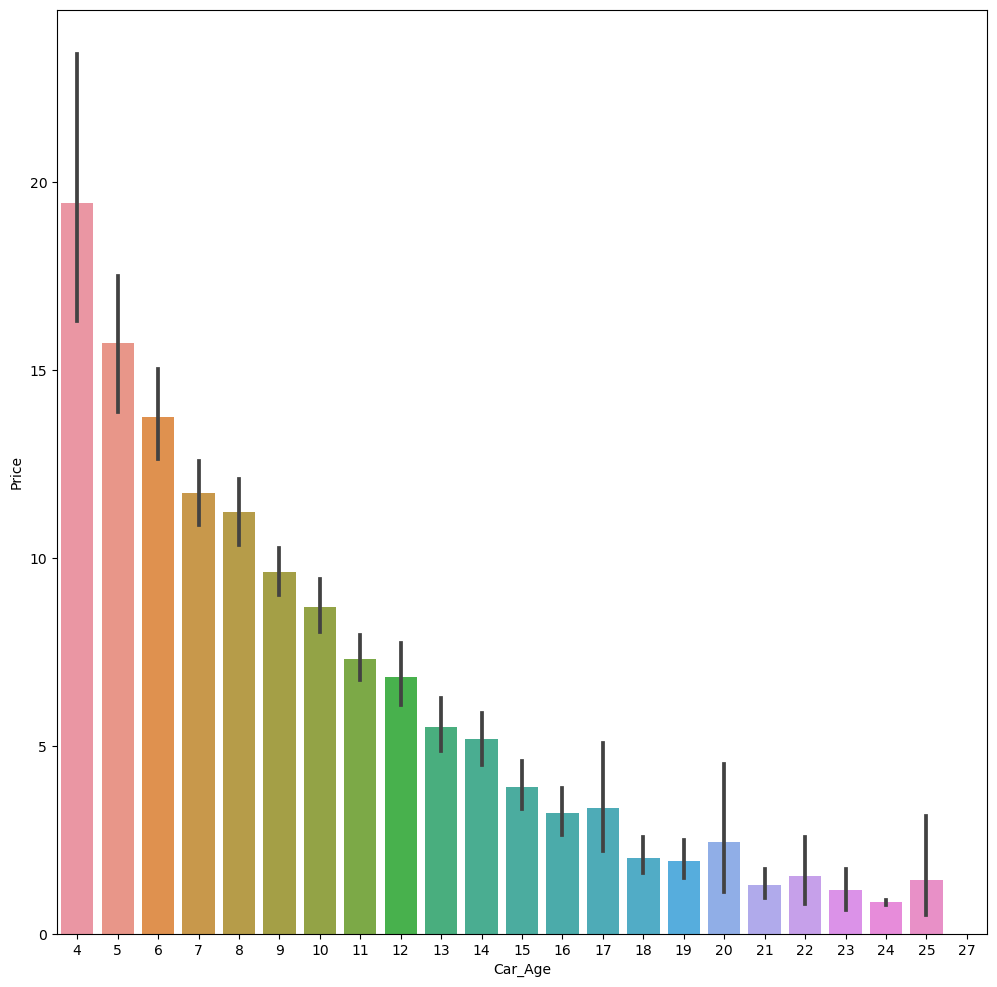

In [45]:
plt.figure(figsize=(12,12), dpi=100)
sns.barplot(x='Car_Age',y='Price',data=cars)

Observations:
    
    The price of the car is high in Coimbatore and less in Kolkata,jaipur.
    Manual cars have less price than automatic cars.
    Diesel and Electric cars have maximum price range,LPG cars have the minimum price.
    First owner cars are higher in price.
    2 Seater has the highest price .
    

### HEAT MAP

A heat map is widely been used for Multivariate Analysis

Heat Map gives the correlation between the variables, whether it has a positive or negative correlation.

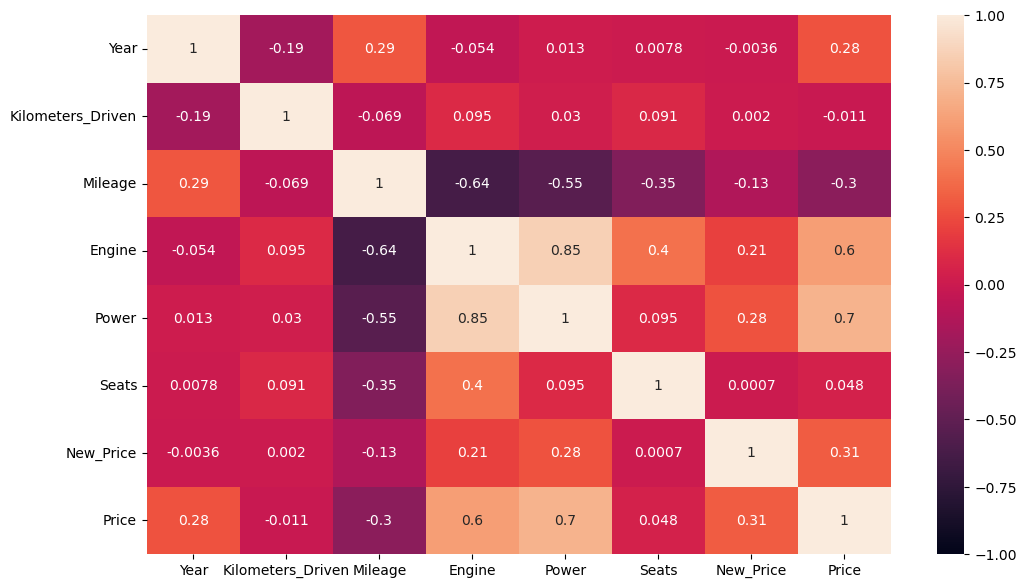

In [41]:
plt.figure(figsize=(12, 7))
sns.heatmap(cars.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

OBSERVATIONS:
    
    *The engine has a strong positive correlation to Power 0.85
    *Mileage has correlated to Engine, Power, and Price negatively
    *Price is moderately positive in correlation to year.

In [90]:
cars[["Price"]].mean()

Price    9.479468
dtype: float64

AVERAGE PRICE WITH FUEL TYPE:

In [92]:
cars[["Fuel_Type", "Price"]].groupby("Fuel_Type").mean()

,Price
Fuel_Type,
CNG,4.093820
Diesel,12.276053
Electric,12.875000
LPG,3.652411
Petrol,6.359047


AVERAGE PRICE WITH SEATS:

In [99]:
cars[["Seats", "Price"]].groupby("Seats").mean()

,Price
Seats,
2.000000,50.130496
4.000000,18.857894
5.000000,8.649736
5.280456,7.057484
6.000000,9.505428
7.000000,14.016263
8.000000,7.886770
9.000000,4.450000
10.000000,6.229801


AVERAGE PRICE WITH TRANSMISSION:

In [100]:
cars[["Transmission", "Price"]].groupby("Transmission").mean()

,Price
Transmission,
Automatic,18.179783
Manual,6.053845


In [102]:
cars.loc[cars['Owner_Type'].str.contains('First')]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,19.894324,1.750000
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,19.894324,12.500000
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.610000,4.500000
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,19.894324,6.000000
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,19.894324,2.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7247,7247,Hyundai EON D Lite Plus,Coimbatore,2015,21190,Petrol,Manual,First,21.10,814.0,55.20,5.0,19.894324,9.479468
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,19.894324,9.479468
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,19.894324,9.479468
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,19.894324,9.479468


In [103]:
cars.loc[~cars['Owner_Type'].str.contains('Third')]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,19.894324,1.750000
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,19.894324,12.500000
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.610000,4.500000
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,19.894324,6.000000
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,19.894324,17.740000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7247,7247,Hyundai EON D Lite Plus,Coimbatore,2015,21190,Petrol,Manual,First,21.10,814.0,55.20,5.0,19.894324,9.479468
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,19.894324,9.479468
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,19.894324,9.479468
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,19.894324,9.479468


In [50]:
cars[(cars.Fuel_Type=='Diesel')].count()

Name                 3852
Location             3852
Year                 3852
Kilometers_Driven    3852
Fuel_Type            3852
Transmission         3852
Owner_Type           3852
Mileage              3852
Engine               3840
Power                3784
Seats                3838
New_Price             539
Price                3205
Car_Age              3852
Brand                3852
Model                3852
dtype: int64

In [167]:
cars[(cars.Seats==2)].count()

Kilometers_Driven            18
Mileage                      18
Engine                       18
Power                        18
Seats                        18
Price                        18
Car_Age                      18
Brand_Audi                   18
Brand_BMW                    18
Brand_Bentley                18
Brand_Chevrolet              18
Brand_Datsun                 18
Brand_Fiat                   18
Brand_Force                  18
Brand_Ford                   18
Brand_Hindustan              18
Brand_Honda                  18
Brand_Hyundai                18
Brand_Isuzu                  18
Brand_Jaguar                 18
Brand_Jeep                   18
Brand_Lamborghini            18
Brand_Land Rover             18
Brand_Mahindra               18
Brand_Maruti                 18
Brand_Mercedes-Benz          18
Brand_Mini Cooper            18
Brand_Mitsubishi             18
Brand_Nissan                 18
Brand_OpelCorsa              18
Brand_Porsche                18
Brand_Re

In [46]:
var = 'Fuel_Type'
cars[var].value_counts()

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64

In [51]:
var = 'Transmission'
cars[var].value_counts()

Manual       5204
Automatic    2049
Name: Transmission, dtype: int64

In [205]:
var = 'Brand'
cars[var].value_counts()

Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land Rover         67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini Cooper        31
Volvo              28
Porsche            19
Jeep               19
Datsun             17
Isuzu               5
Force               3
Bentley             2
Smart               1
Ambassador          1
Lamborghini         1
Hindustan           1
OpelCorsa           1
Name: Brand, dtype: int64

In [52]:
var = 'Owner_Type'
cars[var].value_counts()

First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64

In [208]:
cars[["Brand","Price"]].groupby('Brand').mean()

,Price
Brand,
Ambassador,1.350000
Audi,22.776821
BMW,22.969539
Bentley,34.239734
Chevrolet,4.322941
Datsun,4.562228
Fiat,4.903544
Force,9.333333
Ford,7.265735


In [217]:
cars[(cars.Owner_Type=='First') & ("Brand","Price")].groupby('Brand').mean()

ValueError: operands could not be broadcast together with shapes (7253,) (2,) 

#### PIVOT TABLE

Create a pivot table using INDEX:

In [145]:

p_table = pd.pivot_table(cars, index=['Transmission']) 
print(p_table)


                   Engine  Kilometers_Driven    Mileage  New_Price  \
Transmission                                                         
Automatic     2082.551639       54505.944851  16.010320  22.639397   
Manual        1433.101282       60350.043044  19.266375  18.813491   

                   Power      Price        S.No.     Seats         Year  
Transmission                                                             
Automatic     166.341835  18.179783  3559.250854  5.180403  2013.883846  
Manual         91.670192   6.053845  3652.281514  5.319850  2013.161222  


Create a pivot table using MULTIPLE INDEX:

In [43]:
p_table = pd.pivot_table(cars, index=['Transmission', 'Fuel_Type']) 
print(p_table)

                             Engine  Kilometers_Driven    Mileage  New_Price  \
Transmission Fuel_Type                                                         
Automatic    Diesel     2274.136797       59891.984055  16.095578  23.935646   
             Electric    935.000000       47000.000000  18.346527  16.737162   
             Petrol     1740.054996       44809.504110  15.850104  20.316992   
Manual       CNG        1083.403226       53228.935484  25.445645  17.556691   
             Diesel     1638.745057       71528.560158  20.176535  19.190840   
             LPG        1069.166667       60624.250000  18.695833  19.894324   
             Petrol     1242.250232       49598.858960  18.232262  18.469897   

                             Power      Price     Seats         Year  
Transmission Fuel_Type                                                
Automatic    Diesel     181.588681  22.186225  5.328624  2014.090357  
             Electric    57.000000  12.875000  5.000000  2013.5000

Create pivot table using multiple aggregate function:

In [45]:
p_table = pd.pivot_table(cars, index=['Transmission'], aggfunc= {'Mileage': 'mean', 'Power': 'sum'})
print(p_table)

                Mileage          Power
Transmission                          
Automatic     16.010320  340834.419709
Manual        19.266375  477051.677749


Create Pandas Pivot Table with Values Parameter:

In [48]:
p_table = pd.pivot_table(cars, index = ['Fuel_Type'], values = ['Mileage'], aggfunc = 'mean' )
print(p_table)

             Mileage
Fuel_Type           
CNG        25.445645
Diesel     18.781255
Electric   18.346527
LPG        18.695833
Petrol     17.709262


Create Pandas Pivot Table Using Column Parameter:

In [49]:
p_table = pd.pivot_table(cars, index= ['Owner_Type'], columns = ['Transmission'], values=['Price'], aggfunc = 'mean' )
print(p_table)

                    Price          
Transmission    Automatic    Manual
Owner_Type                         
First           18.876305  6.335466
Fourth & Above   5.500000  4.768946
Second          15.306160  4.901545
Third           12.155448  3.689728
